In [ ]:
#k-means clustering   k-num of clusters
#elbow method-to find the optimal number of clusters
import pandas as pd
data=pd.read_csv('/content/abcnews-date-text.csv',usecols=['headline_text'],nrows=2000)
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
txt=data.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
1995       foreign donations ok for brisbane based senate
1996    former mayor speaks out over mismanagement rep...
1997    fraser shares lead as wind sweeps adelaide course
1998                   fuel prices tipped to jump further
1999            gardens in the sky wins comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
txt=txt.str.replace('[^a-zA-Z0-9]+',' ')
txt

<ipython-input-48-4e7b82e11b12>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+',' ')


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
1995       foreign donations ok for brisbane based senate
1996    former mayor speaks out over mismanagement rep...
1997    fraser shares lead as wind sweeps adelaide course
1998                   fuel prices tipped to jump further
1999            gardens in the sky wins comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
txt=txt.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        aba decid against communiti broadcast licenc
1                  act fire wit must be awar of defam
2           a g call for infrastructur protect summit
3            air nz staff in aust strike for pay rise
4           air nz strike to affect australian travel
                            ...                      
1995          foreign donat ok for brisban base senat
1996      former mayor speak out over mismanag report
1997    fraser share lead as wind sweep adelaid cours
1998                   fuel price tip to jump further
1999          garden in the sky win comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
from nltk.stem.snowball import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
txt=txt.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x))
txt

0       aba decid against communiti broadcast licenc
1                       act fire wit must awar defam
2              call for infrastructur protect summit
3                 air staff aust strike for pay rise
4                air strike affect australian travel
                            ...                     
1995            foreign donat for brisban base senat
1996     former mayor speak out over mismanag report
1997      fraser share lead wind sweep adelaid cours
1998                     fuel price tip jump further
1999            garden the sky win comp for wtc site
Name: headline_text, Length: 2000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(txt)
print(data_vec)

  (0, 1658)	0.4280563088536484
  (0, 408)	0.4280563088536484
  (0, 642)	0.3593661080848701
  (0, 99)	0.31184618515057183
  (0, 801)	0.45118928958262544
  (0, 42)	0.45118928958262544
  (1, 806)	0.4420610121573135
  (1, 247)	0.4596869477074498
  (1, 1872)	0.40777402400082435
  (1, 3147)	0.4420610121573135
  (1, 1117)	0.2951448446877378
  (1, 69)	0.3800814375535031
  (2, 2756)	0.5133515402430333
  (2, 2205)	0.46765740407293954
  (2, 1468)	0.565605113564162
  (2, 1154)	0.2340157028478792
  (2, 467)	0.3782780126792322
  (3, 2388)	0.36835414851578946
  (3, 2061)	0.4002768225823603
  (3, 2723)	0.4213425635049852
  (3, 233)	0.3878935317507906
  (3, 2680)	0.43497212891117293
  (3, 112)	0.37742360853516993
  (3, 1154)	0.21083976278277364
  (4, 2924)	0.47845590446948894
  :	:
  (1996, 1163)	0.37910475332637505
  (1996, 1760)	0.40959589132372526
  (1996, 2005)	0.3265862292633611
  (1996, 2334)	0.3332031402954159
  (1996, 2014)	0.2374640971864701
  (1997, 716)	0.3976199711191794
  (1997, 2777)	0.41

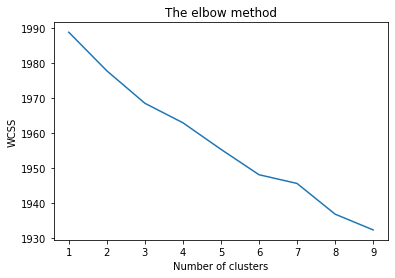

In [ ]:
#elbow method         init-to find initial centroid
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(data_vec)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The elbow method')
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters= 8,init='k-means++',random_state=0)
y=kmeans.fit_predict(data_vec)
y

array([0, 0, 3, ..., 0, 0, 3], dtype=int32)

In [ ]:
data['cluster']=y
data

,headline_text,cluster
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,3
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,0
...,...,...
1995,foreign donations ok for brisbane based senate,3
1996,former mayor speaks out over mismanagement rep...,1
1997,fraser shares lead as wind sweeps adelaide course,0
1998,fuel prices tipped to jump further,0


In [ ]:
data['cluster'].value_counts()

0    1267
3     211
1     167
6      99
5      74
4      68
7      65
2      49
Name: cluster, dtype: int64